In [28]:
from commonfunctions import *
import cv2
import skimage.filters as filters
import scipy.ndimage as nd
from preprocess import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


f:\College Stuff\Pattern Recognition\Project\preprocess.py:16: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  img= filters.gaussian(img, sigma=1)


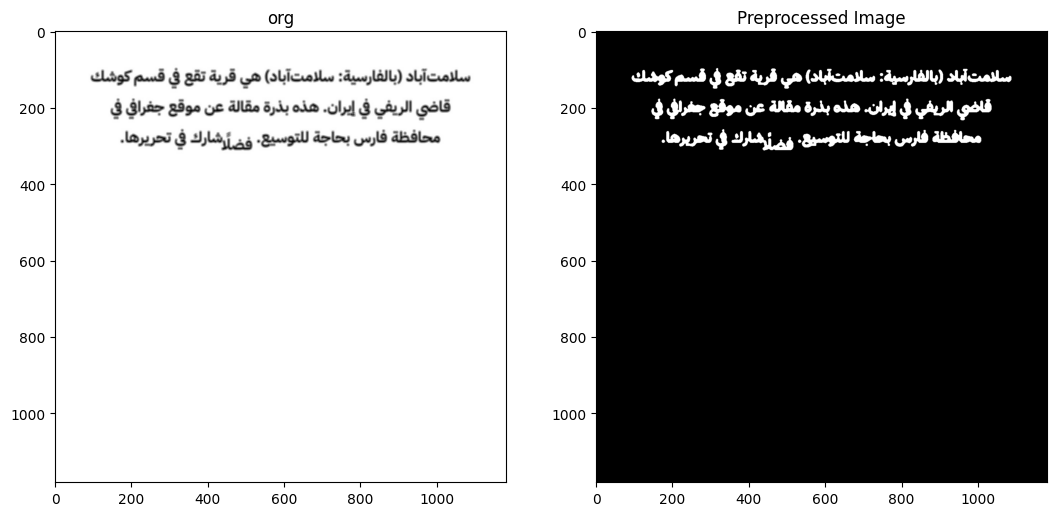

In [18]:
# Lemonada/189.jpeg is rotated 180 degrees
# Lemonada/457.jpeg has salt and pepper noise
# IBM /18.jpeg has blurry
# IBM /2.jpeg has blurry
# IBM /59.jpeg has s&p
# img0 = io.imread('fonts-dataset/Marhey/0.jpeg')
img0 = io.imread('fonts-dataset/IBM Plex Sans Arabic/2.jpeg')
img=preprocess(img0)
show_images([img0,img], ['org','Preprocessed Image'])

0.521484375


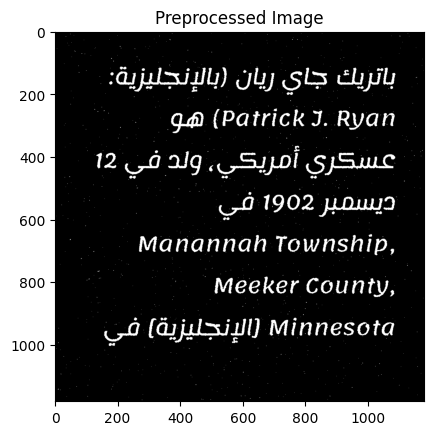

In [6]:
# Lemonada/189.jpeg is rotated 180 degrees
# Lemonada/457.jpeg has salt and pepper noise

img = io.imread('fonts-dataset/Lemonada/324.jpeg')
img = filters.median(img)
img = rgb2gray(img)
# Apply median filter to remove salt and pepper noise
# convert to binary image
thresh = filters.threshold_otsu(img)
print(thresh)
img = img < thresh
img = img.astype(int)
# get all non black Pixels
cntNotBlack = cv2.countNonZero(img)

# get pixel count of image
height, width = img.shape
cntPixels = height*width

# compute all black pixels
cntBlack = cntPixels - cntNotBlack
# Ensure the image is white text on Black background because black pixels should be more than white pixels
if cntBlack < cntNotBlack:
    img = cv2.bitwise_not(img)
show_images([img], ['Preprocessed Image'])

# Output the preprocessed image
# io.imsave('preprocessed.png', img)

#### Note to joseph: After analysis I found that the angle shifting falls only in one of these values [0, 45, 90, 135, 180] so I commented the np.arange line as it consumed ~10 seconds per image

Best angle: 0


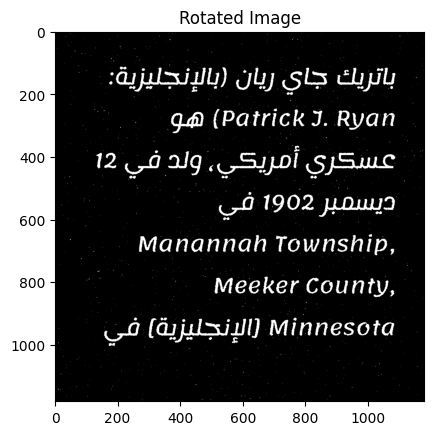

In [5]:
def find_score(arr, angle):
    data = nd.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    # score is the sum of squares of differences of every two consecutive elements in the histogram (variance could also be used)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score


# angles = np.arange(0, 181, 1)

angles = [0, 45, 90, 135, 180] # TODO 180 might be removed later
scores = []

for angle in angles:
    hist, score = find_score(img, angle)
    # print('Angle: {}, Score: {}'.format(angle, score))
    scores.append(score)

best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle)) # correct skew
rotated = nd.rotate(img, best_angle, order=0)
show_images([rotated], ['Rotated Image'])


(1181, 1)


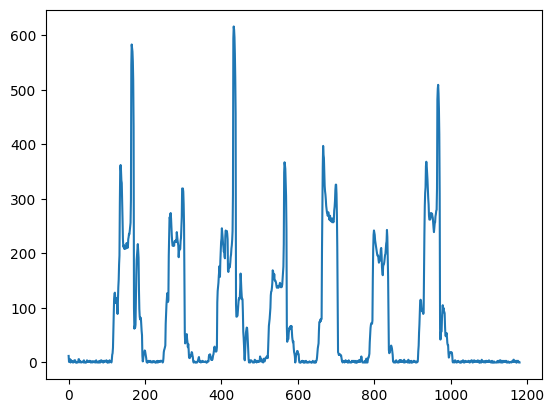

In [4]:
vertical_hist = np.sum(img,axis=0,keepdims=True)
horizontal_hist = np.sum(img,axis=1,keepdims=True)
print(horizontal_hist.shape)
# plot vertical_hist to see the peaks
plt.plot(horizontal_hist.T[0])

In [15]:
from skimage.feature  import *
radius = 3
n_points = 8 * radius
glcm = graycomatrix(rotated,[5],[0])

print(rotated.shape)
print(glcm)
# print(lbp)

ValueError: The levels argument is required for data types other than uint8. The resulting matrix will be at least levels ** 2 in size.

In [ ]:
from skimage.measure import find_contours

# install pip install opencv-contrib-python
# sift = cv2.xfeatures2d.SIFT_create()
# keypoints_1, descriptors_1 = sift.detectAndCompute(rotated,None)
# print(keypoints_1, descriptors_1)

sift = cv2.SIFT_create()
kp = sift.detect(rotated,None)
img=cv2.drawKeypoints(rotated,kp,img)
plt.imshow(img)


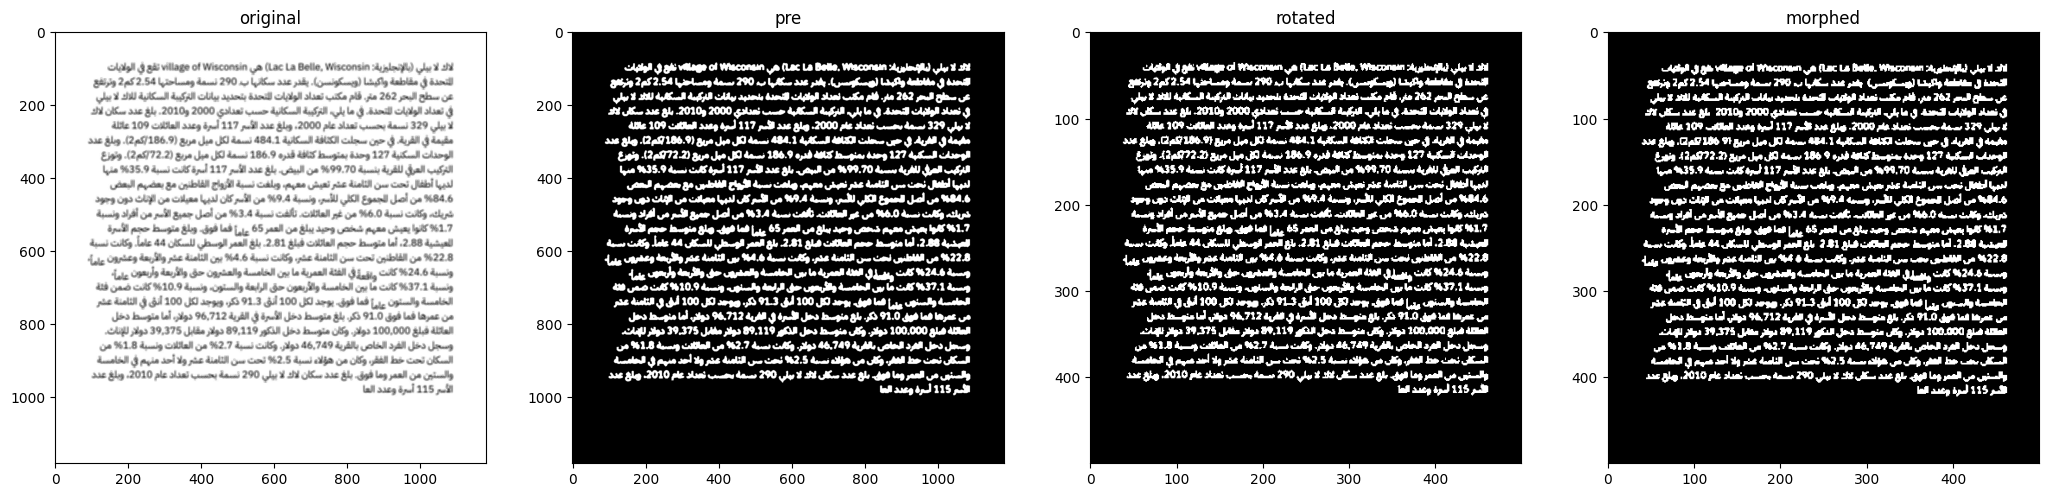

In [68]:
import os 
from preprocess import *
fontName='IBM Plex Sans Arabic'
dir=os.path.join('fonts-dataset',fontName)
outdir=os.path.join('outer',fontName)
img = io.imread(os.path.join(dir,'16.jpeg'),as_gray=True)


preimg=preprocess(img)
rot=removeSkew(preimg,500)
kernel = np.ones((2,2),np.uint8)
# apply opening to img
erot = cv2.morphologyEx(rot, cv2.MORPH_OPEN, kernel)
show_images([img,preimg,rot,erot],['original','pre','rotated','morphed'])

rot= cv2.threshold(rot, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
io.imsave(os.path.join('outer','2outer'+'.jpeg'),rot)
erot= cv2.threshold(erot, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
io.imsave(os.path.join('outer','2morph'+'.jpeg'),erot)
#get all unique values in the image
# rot= cropImage(rot)
# convert the image to binary to be able to see it 
# rot= cv2.threshold(rot, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# cv2.imwrite(os.path.join('outer','0.png'),rot)
# get the nonzero elements of rot
# print(rot.shape)
# nonzero=np.nonzero(rot)
# print(nonzero)
#save images
# io.imsave(os.path.join('outer','0.jpeg'),rot)
# glcm = graycomatrix(rot,[5],[0])
# get lbp of the image
# radius = 3
# n_points = 8 * radius
# lbp = local_binary_pattern(rot, n_points, radius, 'uniform')
# get hog 
# fd, hog_image = hog(rot, orientations=8, pixels_per_cell=(16, 16),
#                     cells_per_block=(1, 1), visualize=True)

